In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

In [2]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 20, x1: -2.382563, x2: -0.158591


/Users/bellaxia/opt/anaconda3/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


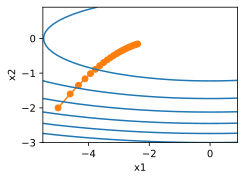

In [3]:
eta=0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


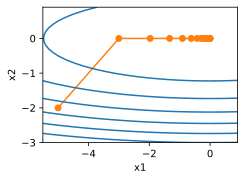

In [4]:
eta=2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [5]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return s_w, s_b

def adagrad(params, states, hyperparams):
    eps=1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.243, 0.116 sec/epoch


([0.06058216094970703,
  0.07041525840759277,
  0.07991409301757812,
  0.09319186210632324,
  0.10320687294006348,
  0.11740374565124512,
  0.13060474395751953,
  0.14089584350585938,
  0.1601858139038086,
  0.1711587905883789,
  0.18588972091674805,
  0.19600963592529297,
  0.21068859100341797,
  0.2207486629486084,
  0.23151755332946777],
 [0.2817600024541219,
  0.25873199488719306,
  0.25166369072596234,
  0.24917070482174555,
  0.24588240131735803,
  0.24580730239550272,
  0.24574571232000986,
  0.2430984465678533,
  0.2431885017156601,
  0.2436232766310374,
  0.2439584102332592,
  0.2433293494383494,
  0.24288560875256857,
  0.24278769119580587,
  0.2425117413600286])

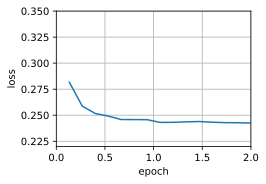

In [6]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
              {'lr': 0.1}, data_iter, feature_dim)

loss: 0.242, 0.099 sec/epoch


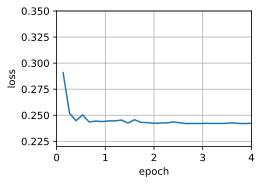

In [7]:
trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr':0.1}, data_iter)